In [29]:
#this script is to plot OT occurrance and OTA in a larger grid resolution
import os 
import matplotlib as mpl
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
from datetime import datetime, date, timedelta
import numpy as np
import pandas as pd
import glob
from pyhdf.SD import SD, SDC
import h5py
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

latres=1
lonres=1
xdim=int(360/lonres)
ydim=int(180/latres)

nlatres=5
nlonres=5
nxdim=int(360/nlonres)
nydim=int(180/nlatres)


All_OT_num=np.zeros((xdim,ydim,12,2),'f')
All_OTA = np.zeros((xdim,ydim,12,2),'f')
#All_OTA_poly = np.zeros((xdim,ydim,12,2),'f')

nAll_OT_num=np.zeros((nxdim,nydim,12,2),'f')
nAll_OTA = np.zeros((nxdim,nydim,12,2),'f')

years=['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',\
    '2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
#years=['2002','2003','2004','2005','2006','2007','2008','2009',\
#    '2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
#years=['2000']

for year in years:
    fname='/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_'+year+'.h5'
    #fname='/data/keeling/a/yulanh/c/OT_climatology/Aqua_MODIS_OTNOT_nopolygon_'+year+'.h5'
    print(fname)
    fid = h5py.File(fname,'r')
    OT_num= fid['OT_num'] 
    OTA = fid['OTA_map']
    #OTA_poly=fid['OTA_poly_map']
    All_OT_num = All_OT_num + OT_num
    All_OTA = All_OTA + OTA#np.multiply(OT_num,OTA)
    #All_OTA_poly = All_OTA_poly + OTA_poly

#=== to average to a new grid ======
for xi in range(nxdim):
    #print(xi,xi*5,(xi+1)*5)
    for yi in range(nydim):
        lonlow=xi*5
        lonup =(xi+1)*5
        latlow=yi*5
        latup =(yi+1)*5
        #print(All_OT_num[lonlow:lonup,latlow:latup,:,:].shape)
        tpnum=np.sum(All_OT_num[lonlow:lonup,latlow:latup,:,:],axis=0)
        tpnum=np.sum(tpnum,axis=0)
        nAll_OT_num[xi,yi,:,:]= tpnum
        tpota=np.sum(All_OTA[lonlow:lonup,latlow:latup,:,:],axis=0)
        tpota=np.sum(tpota,axis=0)
        nAll_OTA[xi,yi,:,:]=tpota
        
#== plot === seasonal ===
fontsz=14
Season_OT_num=np.zeros((nxdim,nydim,4),'f')
All_OT_num_1= np.nansum(nAll_OT_num,axis=3)
Season_OT_num[:,:,0]=All_OT_num_1[:,:,2]+All_OT_num_1[:,:,3]+All_OT_num_1[:,:,4] #MAM
Season_OT_num[:,:,1]=All_OT_num_1[:,:,5]+All_OT_num_1[:,:,6]+All_OT_num_1[:,:,7] #JJA
Season_OT_num[:,:,2]=All_OT_num_1[:,:,8]+All_OT_num_1[:,:,9]+All_OT_num_1[:,:,10] #SON
Season_OT_num[:,:,3]=All_OT_num_1[:,:,11]+All_OT_num_1[:,:,0]+All_OT_num_1[:,:,1] #DJF
print('max, min OT',np.nanmax(Season_OT_num),np.nanmin(Season_OT_num))
print('OT number',np.sum(All_OT_num),np.sum(Season_OT_num),np.nansum(np.nansum(Season_OT_num,axis=0),axis=0))
Season_OTA=np.zeros((nxdim,nydim,4),'f')
All_OTA_1=np.sum(nAll_OTA,axis=3)

Season_OTA[:,:,0]=All_OTA_1[:,:,2]+All_OTA_1[:,:,3]+All_OTA_1[:,:,4] #MAM
Season_OTA[:,:,1]=All_OTA_1[:,:,5]+All_OTA_1[:,:,6]+All_OTA_1[:,:,7] #JJA
Season_OTA[:,:,2]=All_OTA_1[:,:,8]+All_OTA_1[:,:,9]+All_OTA_1[:,:,10] #SON
Season_OTA[:,:,3]=All_OTA_1[:,:,11]+All_OTA_1[:,:,0]+All_OTA_1[:,:,1] #DJF
season_ave_OTA=Season_OTA/Season_OT_num        

/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2000.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2001.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2002.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2003.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2004.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2005.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2006.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2007.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2008.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2009.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2010.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2011.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2012.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2013.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OT

/tmp/ipykernel_195879/2555375978.py:85: RuntimeWarning: invalid value encountered in true_divide
  season_ave_OTA=Season_OTA/Season_OT_num


max, min OT 3897.0 0.0
OT number [439059. 596369. 496061. 379356.]


/tmp/ipykernel_195879/3478347415.py:21: RuntimeWarning: invalid value encountered in true_divide
  season_ave_OTA=Season_OTA/Season_OT_num
/data/keeling/a/yulanh/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/data/keeling/a/yulanh/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/tmp/ipykernel_195879/3478347415.py:81: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig1.subplots_adjust(bottom=0.28, top=0.90, left=0.01, right=0.95,
/tmp/ipykernel_195879/3478347415.py:150: UserWarning: This f

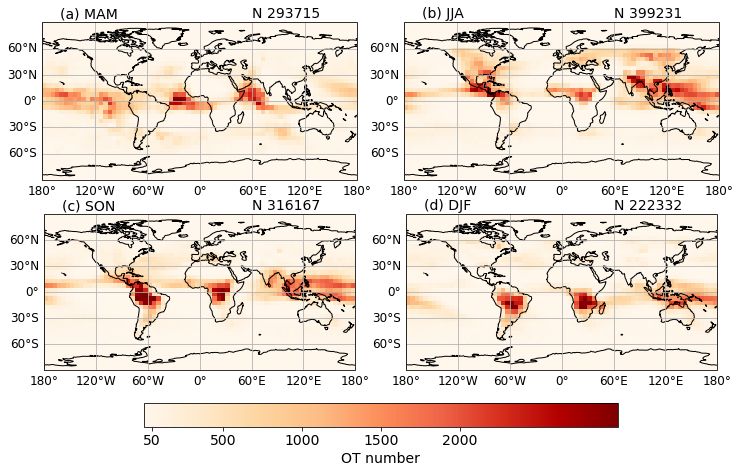

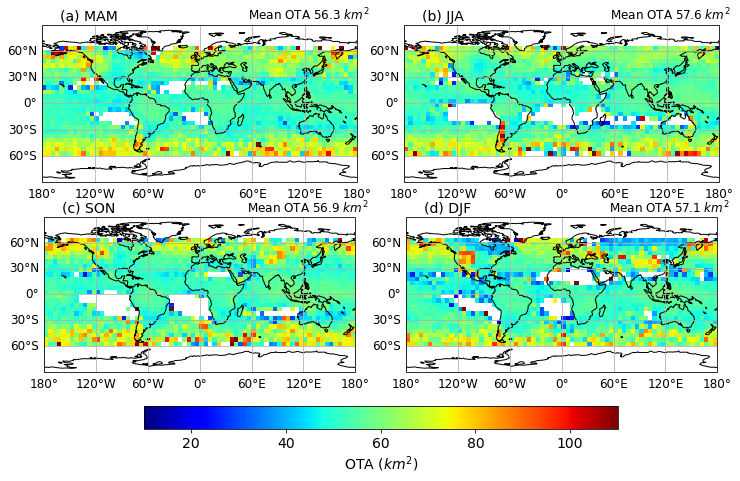

In [5]:
#== plot === seasonal ===
#== plot === seasonal ===
fontsz=14
nvmin=0
nvmax=3000
Season_OT_num=np.zeros((nxdim,nydim,4),'f')
All_OT_num_1= np.nansum(nAll_OT_num,axis=3)
Season_OT_num[:,:,0]=All_OT_num_1[:,:,2]+All_OT_num_1[:,:,3]+All_OT_num_1[:,:,4] #MAM
Season_OT_num[:,:,1]=All_OT_num_1[:,:,5]+All_OT_num_1[:,:,6]+All_OT_num_1[:,:,7] #JJA
Season_OT_num[:,:,2]=All_OT_num_1[:,:,8]+All_OT_num_1[:,:,9]+All_OT_num_1[:,:,10] #SON
Season_OT_num[:,:,3]=All_OT_num_1[:,:,11]+All_OT_num_1[:,:,0]+All_OT_num_1[:,:,1] #DJF
print('max, min OT',np.nanmax(Season_OT_num),np.nanmin(Season_OT_num))
print('OT number',np.nansum(np.nansum(Season_OT_num,axis=0),axis=0))
Season_OTA=np.zeros((nxdim,nydim,4),'f')
All_OTA_1=np.sum(nAll_OTA,axis=3)

Season_OTA[:,:,0]=All_OTA_1[:,:,2]+All_OTA_1[:,:,3]+All_OTA_1[:,:,4] #MAM
Season_OTA[:,:,1]=All_OTA_1[:,:,5]+All_OTA_1[:,:,6]+All_OTA_1[:,:,7] #JJA
Season_OTA[:,:,2]=All_OTA_1[:,:,8]+All_OTA_1[:,:,9]+All_OTA_1[:,:,10] #SON
Season_OTA[:,:,3]=All_OTA_1[:,:,11]+All_OTA_1[:,:,0]+All_OTA_1[:,:,1] #DJF
season_ave_OTA=Season_OTA/Season_OT_num

fig1,axs =plt.subplots(2,2,figsize=([10,10]),subplot_kw={'projection': ccrs.PlateCarree()},constrained_layout=True)
img_extent=(-180,180,-90,90)
data=Season_OT_num[:,:,0]
data=data.T
data=np.fliplr(data)
data[data < nvmin]='nan'
s0=axs[0,0].imshow(data,extent=img_extent,transform=ccrs.PlateCarree(),vmin=nvmin,vmax=nvmax,cmap='OrRd')
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
gl=axs[0,0].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False
axs[0,0].text(-160,95,'(a) MAM',fontsize=14)
axs[0,0].text(60,95,'N 293715',fontsize=14)

data=Season_OT_num[:,:,1]
data=data.T
data=data[::-1]
data[data < nvmin]='nan'
s1=axs[0,1].imshow(data,extent=img_extent,transform=ccrs.PlateCarree(),vmin=nvmin,vmax=nvmax,cmap='OrRd')
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
gl=axs[0,1].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False
axs[0,1].text(-160,95,'(b) JJA',fontsize=14)
axs[0,1].text(60,95,'N 399231',fontsize=14)

data=Season_OT_num[:,:,2]
data=data.T
data=data[::-1]
data[data < nvmin]='nan'
s2=axs[1,0].imshow(data,extent=img_extent,transform=ccrs.PlateCarree(),vmin=nvmin,vmax=nvmax,cmap='OrRd')
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
gl=axs[1,0].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False
axs[1,0].text(-160,95,'(c) SON',fontsize=14)
axs[1,0].text(60,95,'N 316167',fontsize=14)

data=Season_OT_num[:,:,3]
data=data.T
data=data[::-1]
data[data < nvmin]='nan'
s3=axs[1,1].imshow(data,extent=img_extent,transform=ccrs.PlateCarree(),vmin=nvmin,vmax=nvmax,cmap='OrRd')
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
gl=axs[1,1].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False
axs[1,1].text(-160,95,'(d) DJF',fontsize=14)
axs[1,1].text(60,95,'N 222332',fontsize=14)

fig1.subplots_adjust(bottom=0.28, top=0.90, left=0.01, right=0.95,
                    wspace=0.15, hspace=0.01)

#fig.colorbar(s0, ax=axs[1,:],shrink=0.7)
cb2=plt.colorbar(s3,ax=axs[1,:],orientation='horizontal',shrink=0.7,pad=0.15,ticks=[50,500,1000,1500,2000])
cb2.ax.tick_params(labelsize=fontsz)
cb2.set_label(label='OT number',size=fontsz)
fig1.savefig('Aqua_Seasonal_distribution_OT5.jpg')
#plt.show()

#== plot seasonal OTA distributions


fig1,axs =plt.subplots(2,2,figsize=([10,10]),subplot_kw={'projection': ccrs.PlateCarree()},constrained_layout=True)
data=season_ave_OTA[:,:,0]
data=data.T
data=data[::-1]
#data[data==0]='nan'
s0=axs[0,0].imshow(data,extent=img_extent,transform=ccrs.PlateCarree(),vmin=10,vmax=110,cmap='jet')
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
gl=axs[0,0].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False
axs[0,0].text(-160,95,'(a) MAM',fontsize=14)
axs[0,0].text(55,95,'Mean OTA 56.3 $km^2$',fontsize=12)

data=season_ave_OTA[:,:,1]
data=data.T
data=data[::-1]
#data[data==0]='nan'
s0=axs[0,1].imshow(data,extent=img_extent,transform=ccrs.PlateCarree(),vmin=10,vmax=110,cmap='jet')
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
gl=axs[0,1].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False
axs[0,1].text(-160,95,'(b) JJA',fontsize=14)
axs[0,1].text(55,95,'Mean OTA 57.6 $km^2$',fontsize=12)

data=season_ave_OTA[:,:,2]
data=data.T
data=data[::-1]
#data[data==0]='nan'
s0=axs[1,0].imshow(data,extent=img_extent,transform=ccrs.PlateCarree(),vmin=10,vmax=110,cmap='jet')
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
gl=axs[1,0].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False
axs[1,0].text(-160,95,'(c) SON',fontsize=14)
axs[1,0].text(55,95,'Mean OTA 56.9 $km^2$',fontsize=12)

data=season_ave_OTA[:,:,3]
data=data.T
data=data[::-1]
#data[data==0]='nan'
s0=axs[1,1].imshow(data,extent=img_extent,transform=ccrs.PlateCarree(),vmin=10,vmax=110,cmap='jet')
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
gl=axs[1,1].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False
axs[1,1].text(-160,95,'(d) DJF',fontsize=14)
axs[1,1].text(55,95,'Mean OTA 57.1 $km^2$',fontsize=12)
fig1.subplots_adjust(bottom=0.28, top=0.90, left=0.01, right=0.95,
                    wspace=0.15, hspace=0.01)
cb2=plt.colorbar(s0,ax=axs[1,:],orientation='horizontal',shrink=0.7,pad=0.15)
cb2.ax.tick_params(labelsize=fontsz)
cb2.set_label(label='OTA ($km^2$)',size=fontsz)
fig1.savefig('Aqua_Seasonal_distribution_OTA5.jpg')

/tmp/ipykernel_195879/2779518337.py:74: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig1.subplots_adjust(bottom=0.28, top=0.90, left=0.01, right=0.95,


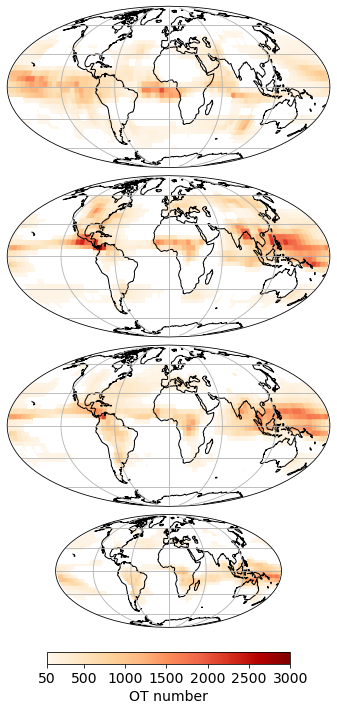

In [30]:
# change projection
#
nvmax=3000
nvmin=50
sum_OT_season=np.nansum(np.nansum(Season_OT_num,axis=0),axis=0)
fig1,axs =plt.subplots(4,1,figsize=([8,15]),subplot_kw={'projection': ccrs.Mollweide()},constrained_layout=True)
img_extent=(-180,180,-90,90)
data=Season_OT_num[:,:,0]
data=data.T
data=np.fliplr(data)
data[data < nvmin]='nan'
s0=axs[0].imshow(data,extent=img_extent,transform=ccrs.PlateCarree(),vmin=nvmin,vmax=nvmax,cmap='OrRd')
axs[0].coastlines(resolution='110m', color='black', linewidth=1)
gl=axs[0].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.ylabels_right = False

#axs[0].text(-160,95,'(a) MAM',fontsize=14)
#axs[0].text(60,95,'N 293715',fontsize=14)

data=Season_OT_num[:,:,1]
data=data.T
data=data[::-1]
data[data < nvmin]='nan'
s1=axs[1].imshow(data,extent=img_extent,transform=ccrs.PlateCarree(),vmin=nvmin,vmax=nvmax,cmap='OrRd')
axs[1].coastlines(resolution='110m', color='black', linewidth=1)
gl=axs[1].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.ylabels_right = False

#axs[1].text(-160,95,'(b) JJA',fontsize=14)
#axs[1].text(60,95,'N 399231',fontsize=14)

data=Season_OT_num[:,:,2]
data=data.T
data=data[::-1]
data[data < nvmin]='nan'
s2=axs[2].imshow(data,extent=img_extent,transform=ccrs.PlateCarree(),vmin=nvmin,vmax=nvmax,cmap='OrRd')
axs[2].coastlines(resolution='110m', color='black', linewidth=1)
gl=axs[2].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabels_bottom = False
gl.ylabels_left = False
#axs[2].text(-160,95,'(c) SON',fontsize=14)
#axs[2].text(60,95,'N 316167',fontsize=14)

data=Season_OT_num[:,:,3]
data=data.T
data=data[::-1]
data[data < nvmin]='nan'
s3=axs[3].imshow(data,extent=img_extent,transform=ccrs.PlateCarree(),vmin=nvmin,vmax=nvmax,cmap='OrRd')
axs[3].coastlines(resolution='110m', color='black', linewidth=1)
gl=axs[3].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabels_bottom = False
gl.ylabels_left = False
#axs[3].text(-180,45,'DJF',fontsize=14)
#axs[3].text(-180,40,'N '+str(sum_OT_season[3]),fontsize=14)

fig1.subplots_adjust(bottom=0.28, top=0.90, left=0.01, right=0.95,
                    wspace=0.15, hspace=0.05)

#fig.colorbar(s0, ax=axs[3],shrink=0.7)
cb2=plt.colorbar(s3,ax=axs[3],orientation='horizontal',shrink=0.45,pad=0.15,ticks=[50,500,1000,1500,2000,2500,3000])
cb2.ax.tick_params(labelsize=fontsz)
cb2.set_label(label='OT number',size=fontsz)
fig1.savefig('Terra_Seasonal_distribution_OT5.jpg')
#plt.show()



shape of original data (72, 36, 12, 2) (72, 36, 12, 2)
total day night num 501664.0 729781.0
max day night num 2787.0 5300.0
ave day night OTA 58.218674 56.177364


/tmp/ipykernel_115646/3751778975.py:14: RuntimeWarning: invalid value encountered in true_divide
  day_OTA=All_OTA_dn[:,:,0]/All_OT_num_dn[:,:,0]
/tmp/ipykernel_115646/3751778975.py:15: RuntimeWarning: invalid value encountered in true_divide
  night_OTA=All_OTA_dn[:,:,1]/All_OT_num_dn[:,:,1]
/tmp/ipykernel_115646/3751778975.py:97: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.26, top=0.9, left=0.01, right=0.95,
/tmp/ipykernel_115646/3751778975.py:130: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.26, top=0.9, left=0.01, right=0.95,


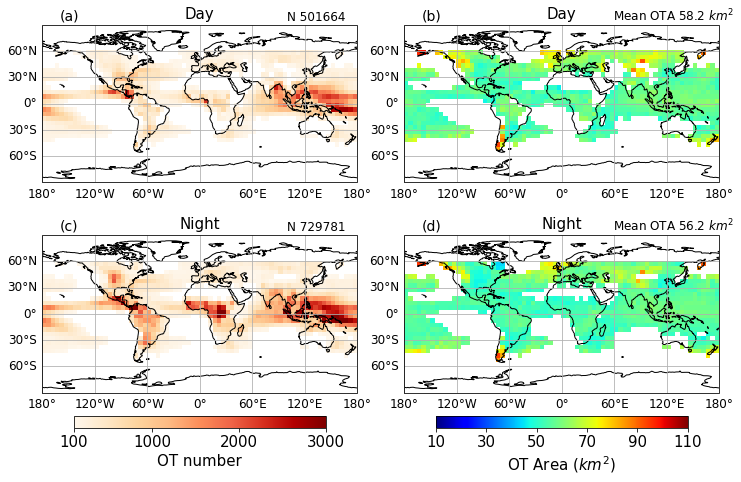

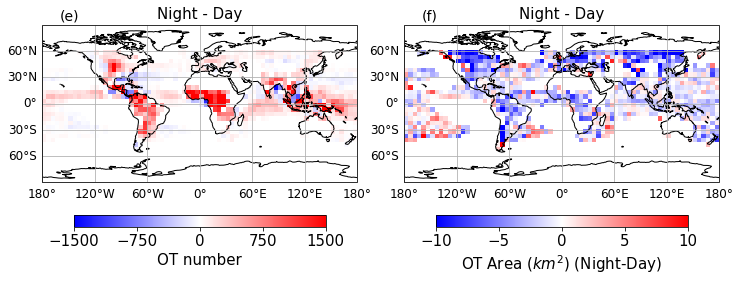

In [37]:
# to plot day vs night
#=== to plot day vs. night 
day_OTnum=np.zeros((nxdim,nydim),'f')
night_OTnum=np.zeros((nxdim,nydim),'f')
day_OTA=np.zeros((nxdim,nydim),'f')
night_OTA=np.zeros((nxdim,nydim),'f')

print('shape of original data',nAll_OT_num.shape,nAll_OTA.shape)
All_OT_num_dn=np.nansum(nAll_OT_num,axis=2)
All_OTA_dn=np.nansum(nAll_OTA,axis=2)

day_OTnum=All_OT_num_dn[:,:,0]
night_OTnum=All_OT_num_dn[:,:,1]
day_OTA=All_OTA_dn[:,:,0]/All_OT_num_dn[:,:,0]
night_OTA=All_OTA_dn[:,:,1]/All_OT_num_dn[:,:,1]

print('total day night num',np.sum(day_OTnum),np.sum(night_OTnum))
print('max day night num',np.max(day_OTnum),np.max(night_OTnum))
print('ave day night OTA',np.sum(All_OTA_dn[:,:,0])/np.sum(day_OTnum),np.sum(All_OTA_dn[:,:,1])/np.sum(night_OTnum))

fig,axs =plt.subplots(2,2,figsize=([10,10]),subplot_kw={'projection': ccrs.PlateCarree()},constrained_layout=True)
img_extent=(-180,180,-90,90)

#ax=plt.axes(projection=ccrs.PlateCarree())
nvmin=100
nvmax=3000
Allnumb1=day_OTnum.T
Day_Allnumb2=Allnumb1[::-1]

ave_OTA_1=day_OTA.T
Day_ave_OTA_2=ave_OTA_1[::-1]
Day_ave_OTA_2[Day_Allnumb2 < nvmin]='nan'
Day_Allnumb2[Day_Allnumb2 < nvmin] = 'nan'

p0=axs[0,0].imshow(Day_Allnumb2,extent=img_extent,transform=ccrs.PlateCarree(),vmin=nvmin,vmax=nvmax,cmap='OrRd')
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].set_title('Day',fontsize=15)
axs[0,0].text(-160,95,'(a)',fontsize=14)
axs[0,0].text(100,95,'N 501664',fontsize=12)
gl=axs[0,0].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False



p1=axs[0,1].imshow(Day_ave_OTA_2,extent=img_extent,transform=ccrs.PlateCarree(),vmin=10,vmax=110,cmap='jet')
#p=axs[0,1].contourf(ave_OTA_2,[10,20,40,60,70,80,90,100,150,200,250,300],extent=img_extent,transform=ccrs.PlateCarree(),\
#                    cmap='tab20c')
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].set_title('Day',fontsize=15)
axs[0,1].text(-160,95,'(b)',fontsize=14)
axs[0,1].text(59,95,'Mean OTA 58.2 $km^2$',fontsize=12)
gl=axs[0,1].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False


#ax=plt.axes(projection=ccrs.PlateCarree())
Allnumb1=night_OTnum.T
Night_Allnumb2=Allnumb1[::-1]
ave_OTA_1=night_OTA.T
Night_ave_OTA_2=ave_OTA_1[::-1]
Night_ave_OTA_2[Night_Allnumb2 < nvmin]='nan'
Night_Allnumb2[Night_Allnumb2 < nvmin] = 'nan'
#index=np.where(Allnumb2 == 0)
#index=index[0]
#Allnumb2[index]=np.nan

p2=axs[1,0].imshow(Night_Allnumb2,extent=img_extent,transform=ccrs.PlateCarree(),vmin=nvmin,vmax=nvmax,cmap='OrRd')
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,0].set_title('Night',fontsize=15)
gl=axs[1,0].gridlines(draw_labels=True)
axs[1,0].text(-160,95,'(c)',fontsize=14)
axs[1,0].text(100,95,'N 729781',fontsize=12)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False


p3=axs[1,1].imshow(Night_ave_OTA_2,extent=img_extent,transform=ccrs.PlateCarree(),vmin=10,vmax=110,cmap='jet')
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,1].set_title('Night',fontsize=15)
gl=axs[1,1].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False
axs[1,1].text(-160,95,'(d)',fontsize=14)
axs[1,1].text(59,95,'Mean OTA 56.2 $km^2$',fontsize=12)


fig.subplots_adjust(bottom=0.26, top=0.9, left=0.01, right=0.95,
                    wspace=0.15, hspace=0.01)

cb1=fig.colorbar(p2,ax=axs[1,0],orientation='horizontal',shrink=0.8,pad=0.1,ticks=[100, 1000,2000,3000])
cb1.ax.tick_params(labelsize=15)
cb1.set_label(label='OT number',size=15)

cb2=fig.colorbar(p3,ax=axs[1,1],orientation='horizontal',shrink=0.8,pad=0.1,ticks=[10, 30, 50,70,90,110])
cb2.ax.tick_params(labelsize=15)
cb2.set_label(label='OT Area ($km^2$)',size=15)

fig.savefig('Day_night_distribution_OT_OTA.jpg')

fig,axs =plt.subplots(nrows=1,ncols=2,figsize=([10,10]),subplot_kw={'projection': ccrs.PlateCarree()},constrained_layout=True)
p4=axs[0].imshow(Night_Allnumb2-Day_Allnumb2,extent=img_extent,transform=ccrs.PlateCarree(),vmin=-1500,vmax=1500,cmap='bwr')
axs[0].coastlines(resolution='110m', color='black', linewidth=1)
gl=axs[0].gridlines(draw_labels=True)
axs[0].text(-160,95,'(e)',fontsize=14)
axs[0].set_title('Night - Day',fontsize=15)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False

p5=axs[1].imshow(Night_ave_OTA_2-Day_ave_OTA_2,extent=img_extent,transform=ccrs.PlateCarree(),vmin=-10,vmax=10,cmap='bwr')
axs[1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1].set_title('Night - Day',fontsize=15)
gl=axs[1].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False
axs[1].text(-160,95,'(f)',fontsize=14)
fig.subplots_adjust(bottom=0.26, top=0.9, left=0.01, right=0.95,
                    wspace=0.15, hspace=0.01)

cb3=fig.colorbar(p4,ax=axs[0],orientation='horizontal',shrink=0.8,pad=0.07,ticks=[-1500, -750,0,750,1500])
cb3.ax.tick_params(labelsize=15)
cb3.set_label(label='OT number',size=15)

cb4=fig.colorbar(p5,ax=axs[1],orientation='horizontal',shrink=0.8,pad=0.07,ticks=[-10, -5,0, 5,10])
cb4.ax.tick_params(labelsize=15)
cb4.set_label(label='OT Area ($km^2$) (Night-Day)',size=15)


shape of original data (72, 36, 12, 2)
total day night num 537544.0 780960.0
max day night num 2892.0 5647.0


/tmp/ipykernel_195879/3843545980.py:65: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.26, top=0.9, left=0.01, right=0.95,


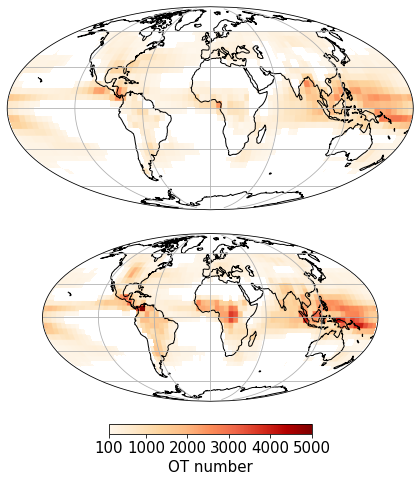

In [31]:
# plot OT occurrences only
# to plot day vs night
#=== to plot day vs. night 
day_OTnum=np.zeros((nxdim,nydim),'f')
night_OTnum=np.zeros((nxdim,nydim),'f')

print('shape of original data',nAll_OT_num.shape)
All_OT_num_dn=np.nansum(nAll_OT_num,axis=2)


day_OTnum=All_OT_num_dn[:,:,0]
night_OTnum=All_OT_num_dn[:,:,1]


print('total day night num',np.sum(day_OTnum),np.sum(night_OTnum))
print('max day night num',np.max(day_OTnum),np.max(night_OTnum))


fig,axs =plt.subplots(2,1,figsize=([6,10]),subplot_kw={'projection': ccrs.Mollweide()},constrained_layout=True)
img_extent=(-180,180,-90,90)

#ax=plt.axes(projection=ccrs.PlateCarree())
nvmin=100
nvmax=5000
Allnumb1=day_OTnum.T
Day_Allnumb2=Allnumb1[::-1]

Day_Allnumb2[Day_Allnumb2 < nvmin] = 'nan'

p0=axs[0].imshow(Day_Allnumb2,extent=img_extent,transform=ccrs.PlateCarree(),vmin=nvmin,vmax=nvmax,cmap='OrRd')
axs[0].coastlines(resolution='110m', color='black', linewidth=1)
#axs[0].set_title('Day',fontsize=15)
#axs[0].text(-160,95,'(a)',fontsize=14)
#axs[0].text(100,95,'N 501664',fontsize=12)
gl=axs[0].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabels_bottom = False
gl.ylabels_left = False


#ax=plt.axes(projection=ccrs.PlateCarree())
Allnumb1=night_OTnum.T
Night_Allnumb2=Allnumb1[::-1]
Night_Allnumb2[Night_Allnumb2 < nvmin] = 'nan'
#index=np.where(Allnumb2 == 0)
#index=index[0]
#Allnumb2[index]=np.nan

p2=axs[1].imshow(Night_Allnumb2,extent=img_extent,transform=ccrs.PlateCarree(),vmin=nvmin,vmax=nvmax,cmap='OrRd')
axs[1].coastlines(resolution='110m', color='black', linewidth=1)
#axs[1].set_title('Night',fontsize=15)
gl=axs[1].gridlines(draw_labels=True)
#axs[1].text(-160,95,'(c)',fontsize=14)
#axs[1].text(100,95,'N 729781',fontsize=12)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabels_bottom = False
gl.ylabels_left = False

fig.subplots_adjust(bottom=0.26, top=0.9, left=0.01, right=0.95,
                    wspace=0.15, hspace=0.06)

cb1=fig.colorbar(p2,ax=axs[1],orientation='horizontal',shrink=0.5,pad=0.1,ticks=[100,1000,2000,3000,4000,5000])
cb1.ax.tick_params(labelsize=15)
cb1.set_label(label='OT number',size=15)


fig.savefig('Terra_Day_night_distribution_OT.jpg')

